In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn
import seaborn as sns

In [2]:
pd.options.display.max_rows = 100

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train=pd.read_csv("train.csv")

In [5]:
sample=pd.read_csv("sample_submission.csv")

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
sample.head()

,Id,SalePrice
0,1001,0.0
1,1002,0.0
2,1003,0.0
3,1004,0.0
4,1005,0.0


In [9]:
train.shape

(1000, 81)

In [10]:
test.shape

(460, 80)

In [11]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       86
LotArea            0
Street             0
Alley            434
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         2
MasVnrArea         2
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          13
BsmtCond          13
BsmtExposure      13
BsmtFinType1      13
BsmtFinSF1         0
BsmtFinType2      13
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [12]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      173
LotArea            0
Street             0
Alley            935
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         6
MasVnrArea         6
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          24
BsmtCond          24
BsmtExposure      25
BsmtFinType1      24
BsmtFinSF1         0
BsmtFinType2      25
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [13]:
sample.isna().sum()

Id           0
SalePrice    0
dtype: int64

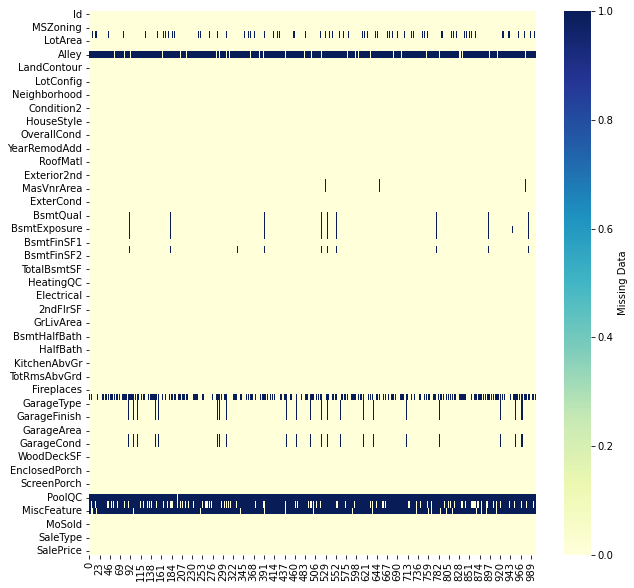

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

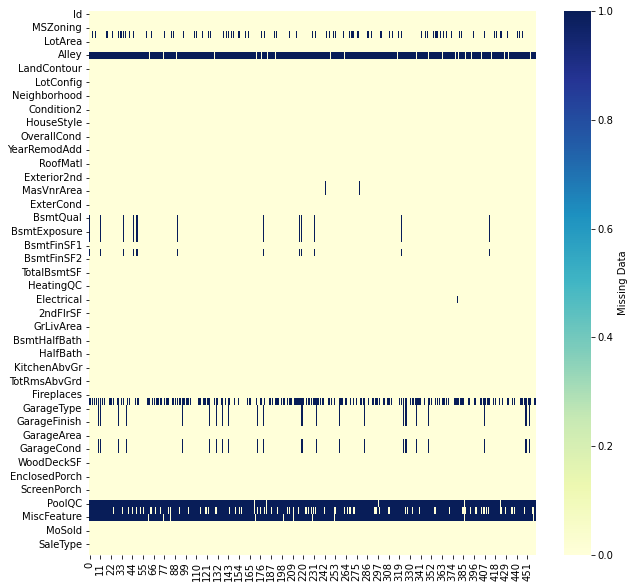

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [16]:
train.loc[:,train.dtypes=="object"]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,BrkSide,Feedr,...,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Abnorml
996,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,COD,Normal
997,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,PosA,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
998,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,Fa,P,NaN,NaN,NaN,WD,Normal


In [17]:
train.drop(["Alley","PoolQC","Fence","MiscFeature","LotFrontage","FireplaceQu","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","LotArea"],axis=1,inplace=True)

In [18]:
test.drop(["Alley","PoolQC","Fence","MiscFeature","LotFrontage","FireplaceQu","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","LotArea"],axis=1,inplace=True)

In [19]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [20]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [21]:
train.loc[:,train.dtypes=="object"]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,BrkSide,Feedr,Norm,...,CBlock,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Abnorml
996,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,CBlock,GasA,TA,Y,SBrkr,TA,Typ,Y,COD,Normal
997,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,PosA,Norm,...,CBlock,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
998,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,...,BrkTil,GasA,Fa,N,SBrkr,TA,Typ,P,WD,Normal


In [22]:
from sklearn.preprocessing import LabelEncoder

categ = ['MSZoning', 'Street', 'LotShape',"LandContour","Utilities","LandSlope","PavedDrive","SaleType","SaleCondition","CentralAir","LotConfig","Condition1","Condition2","BldgType","RoofStyle","RoofMatl","Exterior1st","HouseStyle","Exterior2nd","ExterQual","ExterCond","Foundation","Heating","HeatingQC","Electrical","KitchenQual","Functional","Neighborhood"]

for i in categ:
    LE = LabelEncoder()
    train[i] = LE.fit_transform(train[i])
    test[i] = LE.fit_transform(test[i])

In [23]:
train.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [24]:
test.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,3,1,3,3,0,0,0,6,...,0,0,0,0,0,0,7,2009,6,3
1,1002,30,3,1,3,3,0,0,0,16,...,20,94,0,0,0,0,1,2007,6,0
2,1003,20,3,1,0,3,0,4,0,20,...,104,0,0,0,0,0,7,2008,6,3
3,1004,90,3,1,0,3,0,0,0,13,...,0,0,0,0,0,0,6,2007,6,3
4,1005,120,3,1,3,3,0,4,0,0,...,0,0,0,0,0,0,5,2009,6,3


In [25]:
train.loc[:,train.dtypes=="object"]

""
0
1
2
3
4
...
995
996
997
998


In [26]:
test.loc[:,test.dtypes=="object"]

""
0
1
2
3
4
...
455
456
457
458


In [27]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [28]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [29]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [30]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [31]:
train.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [32]:
train["Street"].value_counts()

1    996
0      4
Name: Street, dtype: int64

In [33]:
train["SalePrice"].value_counts()

140000    14
110000    12
155000    11
135000    11
190000     9
          ..
172400     1
198500     1
177500     1
105900     1
206000     1
Name: SalePrice, Length: 537, dtype: int64

In [34]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.4) 
print(X_train.shape, X_test.shape)

(600, 61) (400, 61)


In [36]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

CPU times: total: 62.5 ms
Wall time: 61.2 ms


In [37]:
clf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(clf, param_grid, cv=5,scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)

C:\Users\Msi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)},
             scoring='accuracy')

In [38]:
scores = pd.DataFrame(grid.cv_results_)
print(scores.shape)
scores.head()

(840, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026729,0.000399,0.007779,0.003645,1,1,2,10,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.008333,0.016667,0.016667,0.016667,0.025,0.016667,0.005270,392
1,0.048670,0.001596,0.008777,0.000399,1,1,2,20,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.016667,0.016667,0.008333,0.016667,0.025,0.016667,0.005270,392
2,0.068617,0.003301,0.012367,0.002327,1,1,2,30,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.016667,0.016667,0.008333,0.016667,0.025,0.016667,0.005270,392
3,0.091954,0.004059,0.014362,0.001493,1,1,2,40,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.016667,0.016667,0.016667,0.016667,0.025,0.018333,0.003333,256
4,0.111303,0.004575,0.017154,0.000747,1,1,2,50,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.016667,0.016667,0.016667,0.016667,0.025,0.018333,0.003333,256


In [39]:
scores['mean_test_score'].max()

0.03

In [40]:
scores[scores['mean_test_score'] == scores['mean_test_score'].max()]['params'].values

array([{'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 40},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 50},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 40},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 50},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 40},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 50},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 40},
       {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 50}],
      dtype=object)

In [41]:
scores = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
scores.head()

,mean_test_score,std_test_score,params
0,0.016667,0.005270,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
1,0.016667,0.005270,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
2,0.016667,0.005270,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
3,0.018333,0.003333,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."
4,0.018333,0.003333,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s..."


In [42]:
best_r_params=grid.best_estimator_.get_params()

In [43]:
grid.best_score_

0.03

In [44]:
grid.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=7, n_estimators=40,
                       random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(**best_r_params)
model.fit(X_train,y_train)
answers_pred = model.predict(X_test)

print(sqrt(mean_squared_error(y_test, answers_pred)))

48547.42457275669


In [46]:
y_pred_test = model.predict(test)

y_pred_test = pd.DataFrame(data = y_pred_test, columns=['SalePrice'])

y_pred_test = y_pred_test.reset_index(drop= True)

y_pred_test.insert (loc=0,column='Id', value=test["Id"])

y_pred_test.to_csv('solution.csv', index = False)

In [47]:
y_pred_test.head()

,Id,SalePrice
0,1001,60000
1,1002,110000
2,1003,201000
3,1004,110000
4,1005,192000
